#  <center> 第一部分 Explore</center >
# 1 Data Visiualization with _ggplot2_
## 1.1 以mpg数据为例
* mpg数据：可以通过 _str(mpg)_ 以及 _?mpg_ 加以了解
* creating a ggplot
```R
  # library(tidyverse)
  ggplot(data=mpg)+geom_point(mapping=aes(x=displ,y=hwy)) 
  # 或者也可以不要写出mapping：
  # ggplot(data=mpg)+geom_point(aes(x=displ,y=hwy))
```
* 模板
```R
  ggplot(data = <DATA>) +
    <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

## 1.2 设置mapping/ aesthetic mapping
* Aesthetics include things like the size, the shape, or the color of your points. For example, you can map the colors of your points to the class variable to reveal the class of each car. 
```R
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, color = class))
```
* To map an aesthetic to a variable, associate the name of the aesthetic to the name of the variable inside ___aes()___. ggplot2 will automatically assign a unique level of the aesthetic (here a unique color) to each unique value of the variable, a process known as ___scaling___. ggplot2 will also add a legend that explains which levels correspond to which values.
* In the preceding example, we mapped class to the color aesthetic, but we could have mapped class to the size aesthetic in the same way. In this case, the exact size of each point would reveal its class affiliation. We get a warning here, because __mapping an unordered variable (class) to an ordered aesthetic (size) is not a good idea__:
```R
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, size = class)) # 此处class是一个categorical variable
    #> Warning: Using size for a discrete variable is not advised.
```
  - 不过，可以将class用作控制透明度(transparency)的变量，或者是点的形状
  ```R
    # 控制透明度(alpha=) 
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, alpha = class))
    # 控制点的形状(shape=)
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, shape = class)) # 由于ggplot2一次只能使用6个形状，因而排在最后的SUV无法标注
  ```
  
## 1.3 common problems
* One common problem when creating ggplot2 graphics is to put the "__+__" in the wrong place: it has to come at the end of the line, not the start.

## 1.4 Facets
* One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to __split your plot into facets__, subplots that each display one subset of the data.To facet your plot by a single variable, use ___facet_wrap()___. The first argument of facet_wrap() should be a formula, which you create with "~" followed by a variable name (here “formula” is the name of a data structure in R, not a synonym for “equation”). The variable that you pass to facet_wrap() should be discrete:
```R
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy)) +
      facet_wrap(~ class, nrow = 2)
```

* To facet your plot on the combination of two variables, add ___facet_grid()___ to your plot call. The first argument of facet_grid() is also a formula. This time the formula should contain two variable names separated by a "~":
```R
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy)) +
      facet_grid(drv ~ cyl)
```

* If you prefer to not facet in the rows or columns dimension, use a . instead of a variable name, e.g., + facet_grid(. ~ cyl).
```R
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy)) +
      facet_grid(.~ cyl)
    =================================================
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy)) +
      facet_grid(cyl~.)
```

## 1.5 Geometric objects
* use different virtual objects to represent the same data——> ___geom___
```R
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy))
    ===============================================
    ggplot(data = mpg) +
      geom_smooth(mapping = aes(x = displ, y = hwy))
    ===============================================
    ggplot(data = mpg) +
      geom_smooth(mapping = aes(x = displ, y = hwy, linetype=drv))
    ===============================================
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy,color=drv))+
      geom_smooth(mapping = aes(x = displ, y = hwy))+
      geom_smooth(mapping = aes(x = displ, y = hwy, linetype=drv))
    ===============================================
    ggplot(data = mpg) +
      geom_smooth(mapping = aes(x = displ, y = hwy))

    ggplot(data = mpg) +
      geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))

    ggplot(data = mpg) +
      geom_smooth(
        mapping = aes(x = displ, y = hwy, color = drv),
        show.legend = FALSE
      )
```

* Imagine if you wanted to change the y-axis to display “cty” instead of “hwy”. You’d need to change the variable in two places, and you might forget to update one. You can avoid this type of repetition by passing a set of mappings to ggplot(). ggplot2 will treat these mappings as __global mappings__ that apply to each geom in the graph. In other words, this code will produce the same plot as the previous code:
```R
    ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
      geom_point() +
      geom_smooth()
```

* You can use the same idea to specify different data for each layer. Here, our smooth line displays just a subset of the mpg dataset, the subcompact cars. The local data argument in geom_smooth() overrides the global data argument in ggplot() for that layer only:
```R
    ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
      geom_point(mapping = aes(color = class)) +
      geom_smooth(
        data = filter(mpg, class == "subcompact"),
        se = FALSE
      )
```

## 1.6 Statistical Transformations
* Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot: bar. hist, smoother, boxplot,...The algorithm used to calculate new values for a graph is called a stat, short for statistical transformation.
```R
    ggplot(data = diamonds) +
      geom_bar(mapping = aes(x = cut))
    ==================================
    ggplot(data = diamonds) +
      stat_count(mapping = aes(x = cut))
```

* You might want to override the default stat. In the following code, I change the stat of geom_bar() from count (the default) to identity.【注意，数据是已经存在的】

```R
    demo <- tribble(
      ~a,      ~b,
      "bar_1", 20,
      "bar_2", 30,
      "bar_3", 40
    )
    
    ggplot(data = demo) +
      geom_bar(
        mapping = aes(x = a, y = b), stat = "identity"
      )

```
* You might want to override the default mapping from transformed variables to aesthetics. For example, you might want to display a bar chart of proportion, rather than count:

```R
    ggplot(data = diamonds) +
      geom_bar(
        mapping = aes(x = cut, y = ..prop.., group = 1) # ..prop..这似乎是一个函数
      )

```
* You might want to draw greater attention to the statistical transformation in your code. For example, you might use stat_summary(), which summarizes the y values for each unique x value, to draw attention to the summary that you’re computing:

```R
    ggplot(data = diamonds) +
      stat_summary(
        mapping = aes(x = cut, y = depth),
        fun.ymin = min, # 将min函数传递给fun.ymin
        fun.ymax = max,
        fun.y = median
      )
```

## 1.7 Position Adjustments
* There’s one more piece of magic associated with bar charts. For example, you can color a bar chart using either the color aesthetic, or more usefully, fill:
```R
    ggplot(data = diamonds) +
      geom_bar(mapping = aes(x = cut, color = cut))
    ggplot(data = diamonds) +
      geom_bar(mapping = aes(x = cut, fill = cut)) # 更推荐
```

* Note what happens if you map the fill aesthetic to another variable, like clarity: the bars are automatically stacked. Each colored rectangle represents a combination of cut and clarity:
```R
    ggplot(data = diamonds) +
      geom_bar(mapping = aes(x = cut, fill = clarity))
```

* The stacking is performed automatically by the position adjustment specified by the __position__ argument. If you don’t want a stacked bar chart, you can use one of three other options: "identity", "dodge" or "fill":
  - position="identity":
  ```R
      ggplot(
        data = diamonds,
        mapping = aes(x = cut, fill = clarity)
      ) +
        geom_bar(alpha = 1/5, position = "identity") # 用alpha控制透明度
      ggplot(
        data = diamonds,
        mapping = aes(x = cut, color = clarity)
      ) +
        geom_bar(fill = NA, position = "identity") # 不填充，但依旧会有不同颜色的框框
  ```
  - position="fill":
  ```R
      ggplot(data = diamonds) +
        geom_bar(
          mapping = aes(x = cut, fill = clarity),
          position = "fill" # 形成的是比例结构
        )
  ```
  - position="dodge":
  ```R
      ggplot(data = diamonds) +
        geom_bar(
          mapping = aes(x = cut, fill = clarity),
          position = "dodge" # 把原先的bar割裂开形成hist
        )
  ```
* position="jitter". The values of hwy and displ are rounded so the points appear on a grid and many points overlap each other. This problem is known as overplotting. This arrangement makes it hard to see where the mass of the data is. You can avoid this gridding by setting the position adjustment to “jitter.” position = "jitter" adds a small amount of random noise to each point. This spreads the points out because no two points are likely to receive the same amount of random noise:
```R
    ggplot(data = mpg) +
      geom_point(
        mapping = aes(x = displ, y = hwy),
        position = "jitter"
      )
```

## 1.8 Coordinates Systems
* __coord_flip()__ switches the x- and y-axes. This is useful (for example) if you want horizontal boxplots. It’s also useful for long labels — it’s hard to get them to fit without overlapping on the x-axis:
```R
    ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
      geom_boxplot()
    ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
      geom_boxplot() +
      coord_flip()
```
* __coord_quickmap()__ sets the aspect ratio correctly for maps. This is very important if you’re plotting spatial data with ggplot2 (which unfortunately we don’t have the space to cover in this book):
```R
    library(maps)
    nz <- map_data("nz")

    ggplot(nz, aes(long, lat, group = group)) +
      geom_polygon(fill = "white", color = "black")

    ggplot(nz, aes(long, lat, group = group)) +
      geom_polygon(fill = "white", color = "black") +
      coord_quickmap()
```

* __coord_polar()__ uses polar coordinates. Polar coordinates reveal an interesting connection between a bar chart and a Coxcomb chart:
```R
    bar <- ggplot(data = diamonds) +
      geom_bar(
        mapping = aes(x = cut, fill = cut),
        show.legend = FALSE,
        width = 1
      ) +
      theme(aspect.ratio = 1) +
      labs(x = NULL, y = NULL)

    bar + coord_flip()
    bar + coord_polar() # 画出一个饼状图
```

## 1.9 The Layered Grammar of Graphics
* 一个模板：In practice, you rarely need to supply all seven parameters to make a graph because ggplot2 will provide useful defaults for everything except the __data, the mappings, and the geom function__.
```R
    ggplot(data = <DATA>) +
      <GEOM_FUNCTION>(
         mapping = aes(<MAPPINGS>),
         stat = <STAT>,
         position = <POSITION>
      ) +
      <COORDINATE_FUNCTION> +
      <FACET_FUNCTION>
```

# 3. Data Transformation with _dplyr_
* the six key ___dplyr___ functions 
  - __filter()__: pcik observations by their _values_
  - __arrange()__: reorder the _rows_ 
  - __select()__: pick variables by their _names_
  - __mutate()__: create _new variables_ with functions of existing variables
  - __summarize()__: collapse many values down to a single summary
  - These can all be used in conjunction with **group_by()**, which changes the scope of each function from operating on the entire dataset to operating on it group-by-group. 
  
## 3.1 Filter Rows with ___filter()___
```R
  filter(flights, month==1,day==1)
```
* comparisons
  - 即使数值相等，但浮点数与整型不同。这时候可以使用 _near()_
  ```R
    sqrt(2)^2==2 # FALSE
    1/49*49!=1 # TRUE
    ====================
    near(sqrt(2)^2,2) # TRUE
  ```
* Logical Operators
  - and: &
  - or: |
  - not: !
  ```R
  filter(flights ,month==11| month==12) # 注意，不同于 filter(flights ,month==11|12)
  =====================================
  filter(flights ,month %in% c(11,12)) 
  =====================================
  filter(flights, !(arr_delay > 120 | dep_delay > 120))
  filter(flights, arr_delay <= 120, dep_delay <= 120)
  ```
* Missing Values: 几乎所有涉及NA的运算结果都是NA，包括判断。因此在判断时，需要使用 ___is.na()___
```R
  x<-NA
  is.na(x) # TRUE
```
  - filter只保留TRUE的数据，有时候还想保留NA的数据，此时，就需要使用 is.na()
  ```R
    df <- tibble(x = c(1, NA, 3))
    filter(df, x > 1)
    filter(df, is.na(x) | x > 1)
  ```
  
## 3.2 Arrange Rows with _arrange()_
* 一个例子
  ```R
    arrange(flights,year,month,day)
  ```
  - 降序可以使用 _desc()_
  ```R
    arrange(flights,desc(arr_delay))
  ```
  - missing values are always sorted at the end:
  ```R
    df<-tibble(x=c(5,2,NA,0))
    arrange(df,x)
  ```

## 3.3 Select Columns with _select()_
* 当变量非常多时，使用 ___select()___ 选择感兴趣的变量
```R
  select(flights,year,month,day) # 或者 select(flights,year:day) ，因为 year，month，day恰好是连续的三个变量
  ==============================
  select(flights,-(year:day))
```
  - 一些有用的函数
    - starts_with("abc") matches names that begin with “abc”
    - ends_with("xyz") matches names that end with “xyz”
    - contains("ijk") matches names that contain “ijk”
    - matches("(.)\\1") selects variables that match a regular expression. This one matches any variables that contain repeated characters.
    - um_range("x", 1:3) matches x1, x2, and x3
* 注意，select也可以用于改变变量名称，但是它会删除余下所有变量，因此，一般通过 _rename()_ 改变量名称
```R
  rename(flights,year_=year) # 改变后的变量名称放在等式左边
```
* 想把部分变量排在前面，可以使用 _everything()_
```R
  select(flights,time_hour,air_time,everything())
```

## 3.4 Add New Variables with _mutate()_
* ___mutate()___ always adds new columns at the end of your dataset so we’ll start by creating a narrower dataset so we can see the new variables. 
```R
    flights_sml <- select(flights,
      year:day,
      ends_with("delay"),
      distance,
      air_time
    )
    
    mutate(flights_sml,
      gain = arr_delay - dep_delay,
      speed = distance / air_time * 60
    ) # 只是返回新增变量后的flights_sml的一个copy，它本身并没有变化
    
    transmute(flights_sml,
      gain = arr_delay - dep_delay,
      speed = distance / air_time * 60
    ) # 只是返回新增的变量，它本身并没有变化
```

## 3.5 Grouped Summaries  with _summarize()_
* 一个例子：
```R
  summarize(flights,delay=mean(dep_delay,na.rm=TRUE))
```

* 一般 _summarize()_ 搭配 _group_by()_ 更有效
```R
  by_day<-group_by(flights,year,month,day)
  summarize(by_day,delay=mean(dep_delay,na.rm=TRUE))
```

* 一个例子：
```R
  by_dest <- group_by(flights, dest)
  delay <- summarize(by_dest,
    count = n(),
    dist = mean(distance, na.rm = TRUE),
    delay = mean(arr_delay, na.rm = TRUE)
  )
  delay <- filter(delay, count > 20, dest != "HNL")

  ggplot(data = delay, mapping = aes(x = dist, y = delay)) +
    geom_point(aes(size = count), alpha = 1/3) +
    geom_smooth(se = FALSE)
  ==========================================================
  # 或者，可以写成
  delays <- flights %>%  # %>% means "then". Behind the scenes, x %>% f(y) turns into f(x, y), and x %>% f(y) %>% g(z) turns into g(f(x, y), z), and so on. You can use the pipe to rewrite multiple operations in a way that you can read left-to-right, top-to-bottom.
    group_by(dest) %>%
    summarize(
      count = n(),
      dist = mean(distance, na.rm = TRUE), # 注意，NA一定要剔除掉，否则会导致大量运算结果为NA
      delay = mean(arr_delay, na.rm = TRUE)
    ) %>%
    filter(count > 20, dest != "HNL")

  ggplot(data = delay, mapping = aes(x = dist, y = delay)) +
    geom_point(aes(size = count), alpha = 1/3) +
    geom_smooth(se = FALSE)
```

* Useful Summary Functions
  - measures of location: mean(x), median(x)
  - measures of spread: sd(x), IQR(x), mad(x). The mean squared deviation, or standard deviation or sd for short, is the standard measure of spread. The interquartile range IQR() and median absolute deviation mad(x) are robust equivalents that may be more useful if you have outliers
  - measures of rank: min(x), quantile(x,0.25), max(x)
  - measures of position: first(x), nth(x,n), last(x)
 
* Ungrouping:
```R
  flights %>% group_by(dest) %>% summarize(n=n())
  flights %>% group_by(dest) %>% ungroup() %>% summarize(n=n())
```

## 3.6 Grouped Mutates (and Filters)
* Find the worst members of each group:
```R
    flights_sml %>%
      group_by(year, month, day) %>%
      filter(rank(desc(arr_delay)) < 10)
```

* Find all groups bigger than a threshold:
```R
    (popular_dests <- flights %>%
      group_by(dest) %>%
      filter(n() > 365))
```

* Standardize to compute per group metrics:
```R
    popular_dests %>%
      filter(arr_delay > 0) %>%
      mutate(prop_delay = arr_delay / sum(arr_delay)) %>%
      select(year:day, dest, arr_delay, prop_delay)
```

* Functions that work most naturally in grouped mutates and filters are known as window functions (versus the summary functions used for summaries). You can learn more about useful window functions in the corresponding vignette: vignette("window-functions").



# 5. Exploratory Data Analysis
## 5.1 Variation
* measure error
* visualizing distributions
  - categorical variable:To examine the distribution of a categorical variable, use a bar chart:
  ```R
    ggplot(data = diamonds) +
      geom_bar(mapping = aes(x = cut))
    ==================================
    count(diamonds,cut) # 或者
    diamonds %>%
      count(cut)
  ```
  - continuous variable: To examine the distribution of a continuous variable, use a histogram:
  ```R
    ggplot(data = diamonds) +
      geom_histogram(mapping = aes(x = carat), binwidth = 0.5)
    ==========================================================
    diamonds %>% count(cut_width(carat,0.5)) # 0.5 是binwidth
  ```
    -  You should always explore a variety of binwidths when working with histograms, as different binwidths can reveal different patterns. For example, here is how the preceding graph looks when we zoom into just the diamonds with a size of less than three carats and choose a smaller binwidth:
    ```R
      smaller <- diamonds %>%
        filter(carat < 3)

      ggplot(data = smaller, mapping = aes(x = carat)) +
        geom_histogram(binwidth = 0.1)
    ```
    - If you wish to overlay multiple histograms in the same plot, I recommend using geom_freqpoly() instead of geom_histogram(). geom_freqpoly() performs the same calculation as geom_histogram(), but instead of displaying the counts with bars, uses lines instead. It’s much easier to understand overlapping lines than bars:
    ```R
      ggplot(data = smaller, mapping = aes(x = carat)) +
        geom_freqpoly(binwidth = 0.1) # 虽然，可以在 geom_histogram 中（ggplot\mapping）加入 fill=cut，但是效果不如使用line的geom_freqpoly
    ```

* typical values
```R
  ggplot(data = smaller, mapping = aes(x = carat)) +
    geom_histogram(binwidth = 0.01)
  ==================================================
  ggplot(data = faithful, mapping = aes(x = eruptions)) +
    geom_histogram(binwidth = 0.25)
```

  In general, clusters of similar values suggest that subgroups exist in your data. 
  
* unusual values: Outliers are observations that are unusual; data points that don’t seem to fit the pattern. Sometimes outliers are data entry errors; other times outliers suggest important new science. When you have a lot of data, outliers are sometimes difficult to see in a __histogram__.例如
```R
  ggplot(diamonds) +
    geom_histogram(mapping = aes(x = y), binwidth = 0.5)
```
  To make it easy to see the unusual values, we need to zoom in to small values of the y-axis with coord_cartesian():
```R
    ggplot(diamonds) +
      geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
      coord_cartesian(ylim = c(0, 50))
    ========================================================
    (unusual <- diamonds %>%
      filter(y < 3 | y > 20) %>%
      arrange(y))
```

## 5.2 Missing Values
* 当遇见异常值时，一般采用两种做法：
  - Drop the entire row with the strange values:
  ```R
    diamonds2 <- diamonds %>%
      filter(between(y, 3, 20)) # 但是不推荐，because one measurement is invalid, doesn’t mean all the measurements are，所以不该整行删除
  ```
  - replacing the unusual values with missing values. The easiest way to do this is to use mutate() to replace the variable with a modified copy. You can use the ifelse() function to replace unusual values with NA:
  ```R
    diamonds2 <- diamonds %>%
      mutate(y = ifelse(y < 3 | y > 20, NA, y))
  ```

  Other times you want to understand what makes observations with missing values different from observations with recorded values. For example, in nycflights13::flights, missing values in the dep_time variable indicate that the flight was cancelled. So you might want to compare the scheduled departure times for cancelled and noncancelled times. You can do this by making a new variable with is.na():
```R
    nycflights13::flights %>%
      mutate(
        cancelled = is.na(dep_time),
        sched_hour = sched_dep_time %/% 100,
        sched_min = sched_dep_time %% 100,
        sched_dep_time = sched_hour + sched_min / 60
      ) %>%
      ggplot(mapping = aes(sched_dep_time)) +
        geom_freqpoly(
          mapping = aes(color = cancelled),
          binwidth = 1/4
        )
```

## 5.2 Covariation
The best way to spot covariation is to visualize the relationship between two or more variables. How you do that should again depend on the type of variables involved.
* A Categorical and Continuous Variable(以类别变量区分／比较连续变量时，存在一定的问题)：The default appearance of geom_freqpoly() is not that useful for that sort of comparison because the height is given by the count. That means if one of the groups is much smaller than the others, it’s hard to see the differences in shape.
```R
  ggplot(data = diamonds, mapping = aes(x = price)) +
    geom_freqpoly(mapping = aes(color = cut), binwidth = 500)
```

  - 解决的方法1就是将 count 换成 density
  ```R
    ggplot(
      data = diamonds,
        mapping = aes(x = price, y = ..density..)
      ) +
      geom_freqpoly(mapping = aes(color = cut), binwidth = 500)
  ```
  - 另一种方法是使用 boxplot. A boxplot is a type of visual shorthand for a distribution of values that is popular among statisticians.
  ```R
    ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
      geom_boxplot()
    ============================================================
    ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
      geom_boxplot()
    # To make the trend easier to see, we can reorder class based on the median value of hwy:
    ggplot(data = mpg) +
      geom_boxplot(
        mapping = aes(
          x = reorder(class, hwy, FUN = median),
          y = hwy
        )
      )
    # If you have long variable names, geom_boxplot() will work better if you flip it 90°. You can do that with coord_flip():
    ggplot(data = mpg) +
      geom_boxplot(
        mapping = aes(
          x = reorder(class, hwy, FUN = median),
          y = hwy
        )
      ) +
      coord_flip()
  ```

* Two Categorical Variables
  - To visualize the covariation between categorical variables, you’ll need to count the number of observations for each combination. One way to do that is to rely on the built-in ***geom_count()***:
```R
    ggplot(data = diamonds) +
      geom_count(mapping = aes(x = cut, y = color))
```
  - Another approach is to compute the count with dplyr, then visualize with geom_tile() and the fill aesthetic:
  ```R
    diamonds %>%
      count(color, cut) %>%
      ggplot(mapping = aes(x = color, y = cut)) +
        geom_tile(mapping = aes(fill = n))
  ```
  
* Two Continuous Variables
  - one great way to visualize the covariation between two continuous variables: draw a scatterplot with geom_point():
  ```R
    ggplot(data = diamonds) +
      geom_point(mapping = aes(x = carat, y = price))
    =================================================
    # Scatterplots become less useful as the size of your dataset grows, because points begin to overplot, and pile up into areas of uniform black. Use the alpha aesthetic to add transparency:
    ggplot(data = diamonds) +
      geom_point(
        mapping = aes(x = carat, y = price),
        alpha = 1 / 100
      )
  ```
  - But using transparency can be challenging for very large datasets. Another solution is to use bin. Previously you used geom_histogram() and geom_freqpoly() to bin in one dimension. Now you’ll learn how to use geom_bin2d() and geom_hex() to bin in two dimensions. geom_bin2d() and geom_hex() divide the coordinate plane into 2D bins and then use a fill color to display how many points fall into each bin. geom_bin2d() creates rectangular bins. geom_hex() creates hexagonal bins. You will need to install the hexbin package to use geom_hex():
  ```R
    ggplot(data = smaller) +
      geom_bin2d(mapping = aes(x = carat, y = price))

    # install.packages("hexbin")
    ggplot(data = smaller) +
      geom_hex(mapping = aes(x = carat, y = price))
  ```
  - Another option is to bin one continuous variable so it acts like a categorical variable. Then you can use one of the techniques for visualizing the combination of a categorical and a continuous variable that you learned about. For example, you could bin carat and then for each group, display a boxplot:
  ```R
    ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
      geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))
    =============================================================
    # By default, boxplots look roughly the same (apart from the number of outliers) regardless of how many observations there are, so it’s difficult to tell that each boxplot summarizes a different number of points. One way to show that is to make the width of the boxplot proportional to the number of points with varwidth = TRUE. 
    ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
      geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)),varwidth = TRUE)
    ============================================================================
    # Another approach is to display approximately the same number of points in each bin. That’s the job of cut_number():
    ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
      geom_boxplot(mapping = aes(group = cut_number(carat, 20)))
  ```


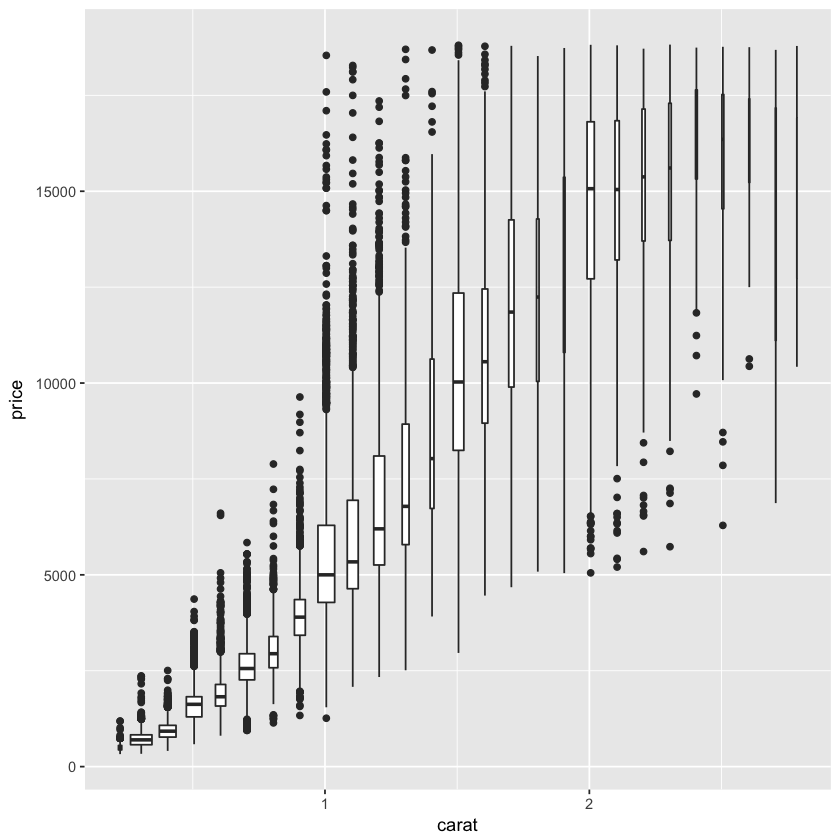

In [45]:
#library(tidyverse)
ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
      geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)),varwidth = TRUE)

#  <center> 第二部分 Wrangle</center >
# 7 Tibbles with tibble
## 7.1 Creating Tibbles
* __as_tibble()__
```R
 library(tidyverse)
 as_tibble(iris)
```
* __tibble()__
```R
 tibble(
     x= 1:5,
     y=1, # 自动填充成5个1
     z=x^2+y
     )
```
  * It’s possible for a tibble to have column names that are not valid R variable names, aka ___nonsyntactic___ names.
  ```R
    tb <- tibble(
      `:)` = "smile",
      ` ` = "space",
      `2000` = "number"
    )
    tb
```
* __tribble()__: transposed tibble
```R
    tribble(
      ~x, ~y, ~z,
      #--|--|----
      "a", 2, 3.6,
      "b", 1, 8.5
    )
```
## 7.2 Tibbles Versus data.frame
二者在使用时，主要有两种差别：printing和subsetting
* printing
```R
  tibble(
    a = lubridate::now() + runif(1e3) * 86400,
    b = lubridate::today() + runif(1e3) * 30,
    c = 1:1e3,
    d = runif(1e3),
    e = sample(letters, 1e3, replace = TRUE)
  )
```

In [1]:
 library(tidyverse)
a<-tibble(
  a = lubridate::now() + runif(1e3) * 86400,
  b = lubridate::today() + runif(1e3) * 30,
  c = 1:1e3,
  d = runif(1e3),
  e = sample(letters, 1e3, replace = TRUE)
)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.2.4
√ tibble  1.4.2     √ dplyr   0.7.4
√ tidyr   0.8.0     √ stringr 1.3.0
√ readr   1.1.1     √ forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
options(tibbles.print_max=15)
print(a)

# A tibble: 1,000 x 5
   a                   b              c      d e    
   <dttm>              <date>     <int>  <dbl> <chr>
 1 2018-02-22 02:25:59 2018-02-24     1 0.638  n    
 2 2018-02-22 17:10:57 2018-03-13     2 0.932  y    
 3 2018-02-22 07:52:18 2018-03-05     3 0.286  n    
 4 2018-02-22 13:04:56 2018-03-09     4 0.634  j    
 5 2018-02-21 23:43:28 2018-03-17     5 0.514  d    
 6 2018-02-22 04:17:18 2018-03-14     6 0.0671 a    
 7 2018-02-21 23:48:42 2018-03-18     7 0.790  n    
 8 2018-02-22 02:18:19 2018-03-17     8 0.999  v    
 9 2018-02-22 15:36:39 2018-03-15     9 0.188  d    
10 2018-02-22 10:25:14 2018-02-24    10 0.796  c    
# ... with 990 more rows
